### The Credit Card Fraud Detection project is used to identify whether a new transaction is fraudulent or not by modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. Use RFA to see how accurate they are in detecting whether a transaction is a normal payment or a fraud.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sp
import seaborn as sns
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
heart=pd.read_csv("heart (1).csv")

In [3]:
heart

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
heart.shape

(4240, 16)

In [6]:
heart.keys()

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
heart.corr()[["TenYearCHD"]]

,TenYearCHD
male,0.088374
age,0.225408
education,-0.054248
currentSmoker,0.019448
cigsPerDay,0.057755
BPMeds,0.087519
prevalentStroke,0.061823
prevalentHyp,0.177458
diabetes,0.097344
totChol,0.082369


In [8]:
heart.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
mode=heart["glucose"].mode()

In [10]:
heart["glucose"].fillna(heart["glucose"].mode()[0], inplace=True)

In [11]:
heart.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose              0
TenYearCHD           0
dtype: int64

In [12]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.326415,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,22.919885,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [13]:
heart.dropna(inplace=True)

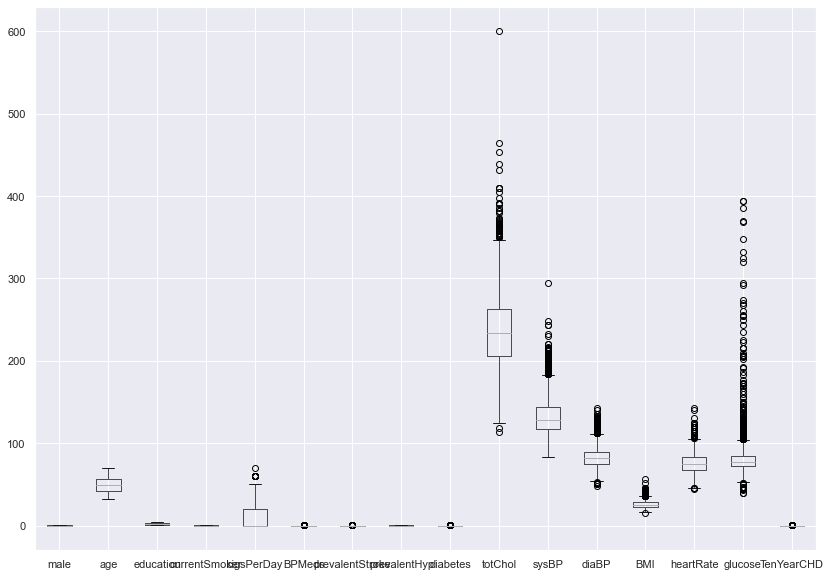

In [14]:
plt.figure(figsize=(14,10), facecolor="w") 
sns.set(font_scale=1)
heart.boxplot()
plt.show()

In [15]:
heart["totChol"].max()

600.0

In [16]:
heart["sysBP"].max()

295.0

In [17]:
heart["totChol"].describe()

count    3989.000000
mean      236.597393
std        44.021011
min       113.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       600.000000
Name: totChol, dtype: float64

In [18]:
heart=heart[heart['totChol']<600]
heart=heart[heart['sysBP']<295]

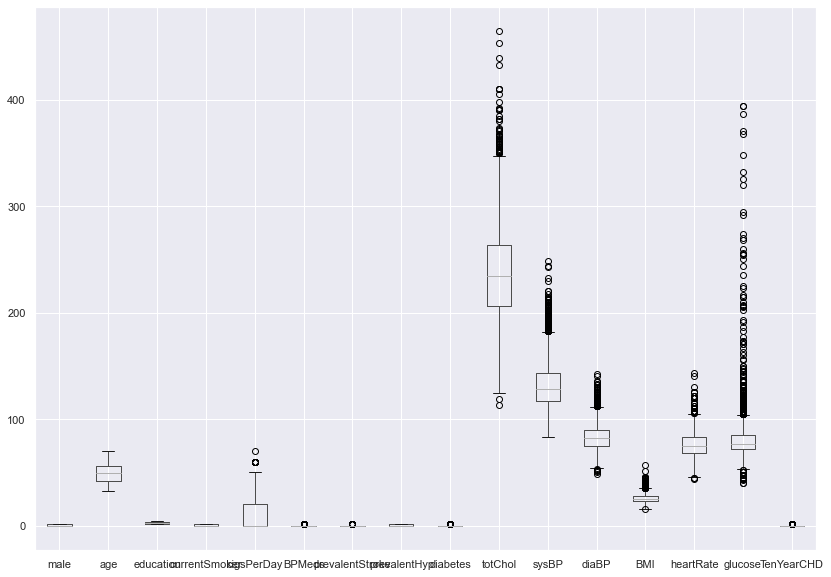

In [19]:
plt.figure(figsize=(14,10), facecolor="w") 
sns.set(font_scale=1)
heart.boxplot()
plt.show()

In [20]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,1.982694,0.491347,9.027840,0.029345,0.005518,0.309255,0.025082,236.502132,132.177452,82.849887,25.769488,75.869325,81.272385,0.148733
std,0.495608,8.531325,1.020832,0.499988,11.918332,0.168794,0.074087,0.462244,0.156392,43.653337,21.793408,11.854644,4.075145,12.086398,22.954842,0.355870
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [21]:
heart.shape

(3987, 16)

In [22]:
heart.corr()[["TenYearCHD"]]

,TenYearCHD
male,0.092442
age,0.228941
education,-0.053684
currentSmoker,0.023450
cigsPerDay,0.060126
BPMeds,0.090205
prevalentStroke,0.044988
prevalentHyp,0.174795
diabetes,0.086217
totChol,0.078166


<AxesSubplot:>

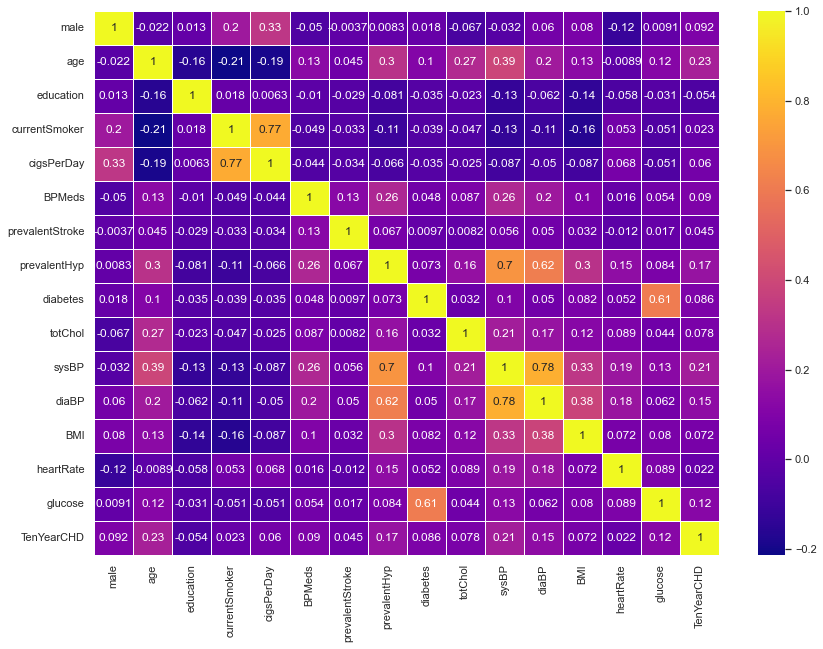

In [23]:
plt.figure(figsize=(14,10))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.heatmap(heart.corr(),cmap='plasma',annot=True,linecolor='white',linewidth=1.0)

In [24]:
heart.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022271,0.012846,0.200413,0.325378,-0.050109,-0.003655,0.008331,0.018317,-0.067404,-0.031767,0.060054,0.080171,-0.115686,0.009070,0.092442
age,-0.022271,1.000000,-0.160758,-0.213310,-0.190319,0.128583,0.045118,0.304031,0.104931,0.271461,0.389472,0.204822,0.133489,-0.008925,0.116007,0.228941
education,0.012846,-0.160758,1.000000,0.018139,0.006329,-0.010156,-0.028592,-0.081164,-0.034995,-0.023309,-0.127374,-0.062408,-0.135678,-0.057808,-0.031328,-0.053684
currentSmoker,0.200413,-0.213310,0.018139,1.000000,0.770796,-0.049012,-0.032574,-0.105110,-0.038933,-0.047181,-0.129719,-0.108840,-0.164294,0.052682,-0.051469,0.023450
cigsPerDay,0.325378,-0.190319,0.006329,0.770796,1.000000,-0.044054,-0.033985,-0.066410,-0.035235,-0.024983,-0.086929,-0.050388,-0.087239,0.068342,-0.050903,0.060126
BPMeds,-0.050109,0.128583,-0.010156,-0.049012,-0.044054,1.000000,0.127479,0.259859,0.048140,0.087307,0.262652,0.196724,0.103322,0.016391,0.054397,0.090205
prevalentStroke,-0.003655,0.045118,-0.028592,-0.032574,-0.033985,0.127479,1.000000,0.067370,0.009705,0.008219,0.055719,0.049504,0.031511,-0.012082,0.016523,0.044988
prevalentHyp,0.008331,0.304031,-0.081164,-0.105110,-0.066410,0.259859,0.067370,1.000000,0.073136,0.163205,0.695979,0.615394,0.303619,0.150751,0.083679,0.174795
diabetes,0.018317,0.104931,-0.034995,-0.038933,-0.035235,0.048140,0.009705,0.073136,1.000000,0.032146,0.100603,0.050340,0.082461,0.051506,0.608596,0.086217
totChol,-0.067404,0.271461,-0.023309,-0.047181,-0.024983,0.087307,0.008219,0.163205,0.032146,1.000000,0.214626,0.171085,0.122846,0.088668,0.044419,0.078166


In [25]:
heart.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [26]:
cf=['male', 'education', 'currentSmoker', 'BPMeds',
       'prevalentHyp', 'diabetes']
for f in cf :
    print(heart[f].value_counts())

0    2259
1    1728
Name: male, dtype: int64
1.0    1653
2.0    1209
3.0     666
4.0     459
Name: education, dtype: int64
0    2028
1    1959
Name: currentSmoker, dtype: int64
0.0    3870
1.0     117
Name: BPMeds, dtype: int64
0    2754
1    1233
Name: prevalentHyp, dtype: int64
0    3887
1     100
Name: diabetes, dtype: int64


In [27]:
nf=[ 'age', 'cigsPerDay','prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
for f in nf :
    print(heart[f].value_counts())

40    181
46    179
42    173
41    165
48    163
39    162
44    159
43    154
45    152
52    138
38    137
51    136
53    134
55    134
50    131
54    129
47    127
49    124
56    114
57    113
59    112
58    108
60    105
63    104
61     98
62     95
37     86
64     83
36     82
65     51
67     39
35     39
66     35
68     16
34     16
69      6
33      5
32      1
70      1
Name: age, dtype: int64
0.0     2028
20.0     701
30.0     205
15.0     203
10.0     137
9.0      119
5.0      117
3.0       91
40.0      75
1.0       64
43.0      55
25.0      49
35.0      22
6.0       17
2.0       16
7.0       12
8.0       10
60.0      10
4.0        8
17.0       7
18.0       7
50.0       5
11.0       5
23.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64
0    3965
1      22
Name: prevalentStroke, dtype: int64
0    2754
1    1233
Name: prevalentHyp, dtype: int64
240.0    79
220.0

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


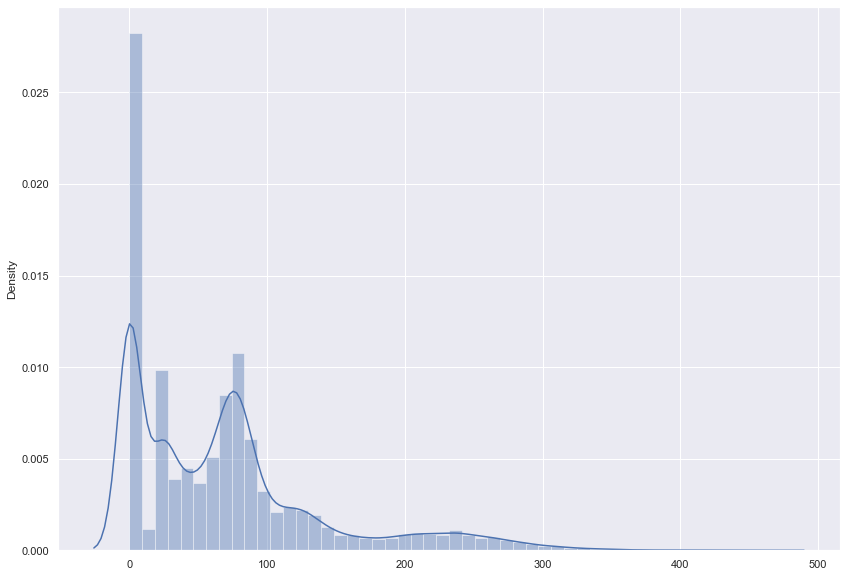

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


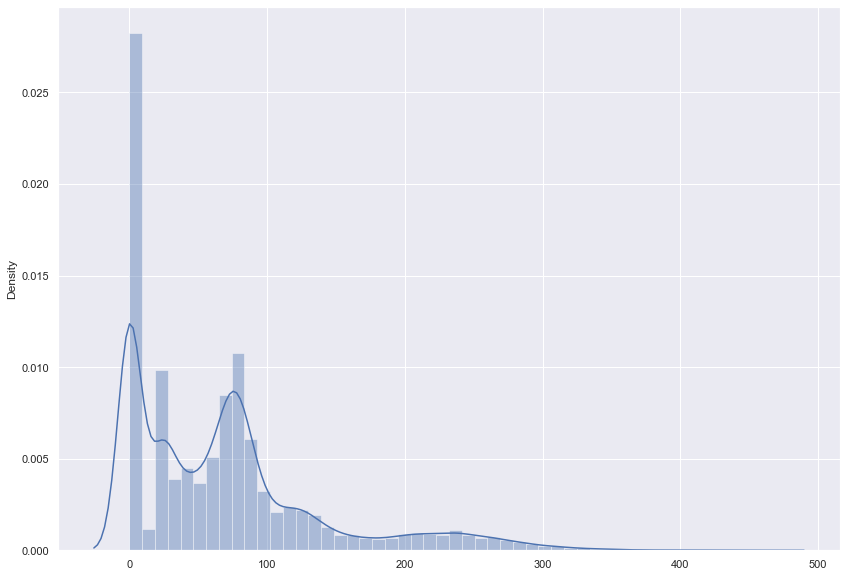

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


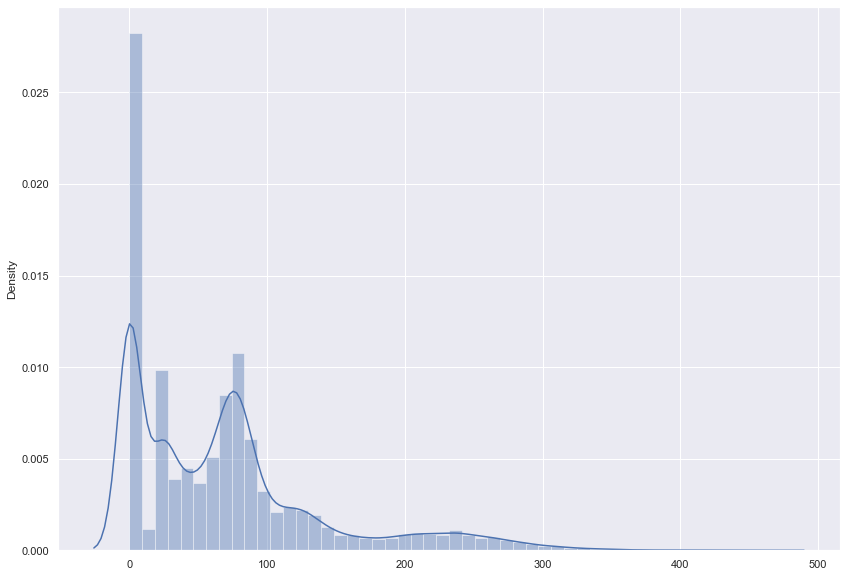

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


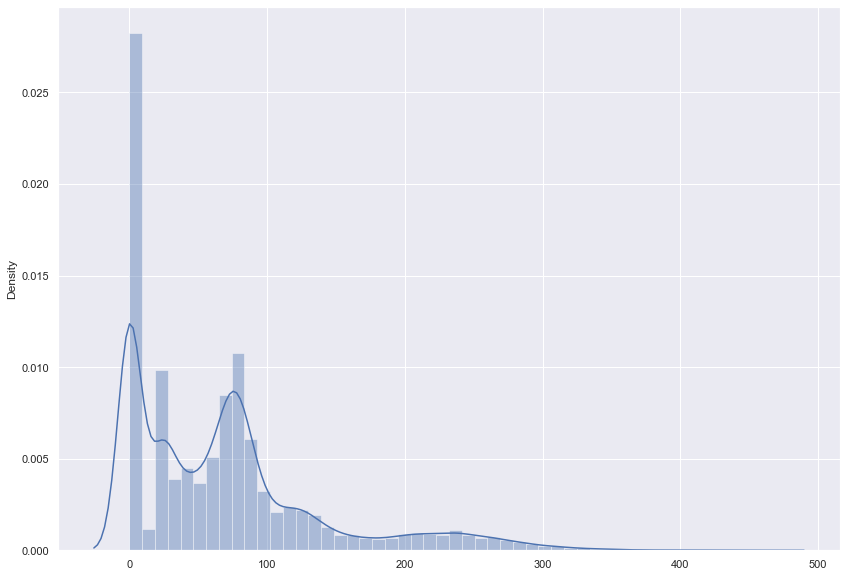

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


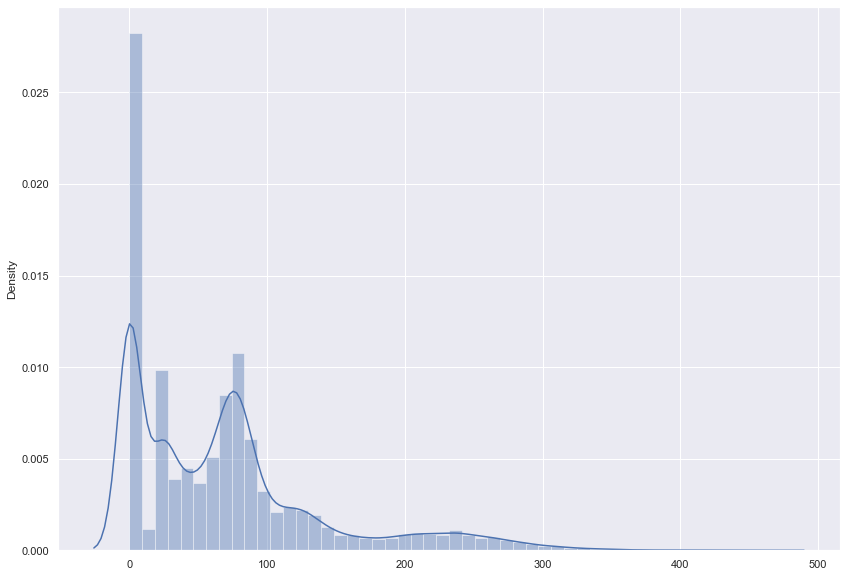

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


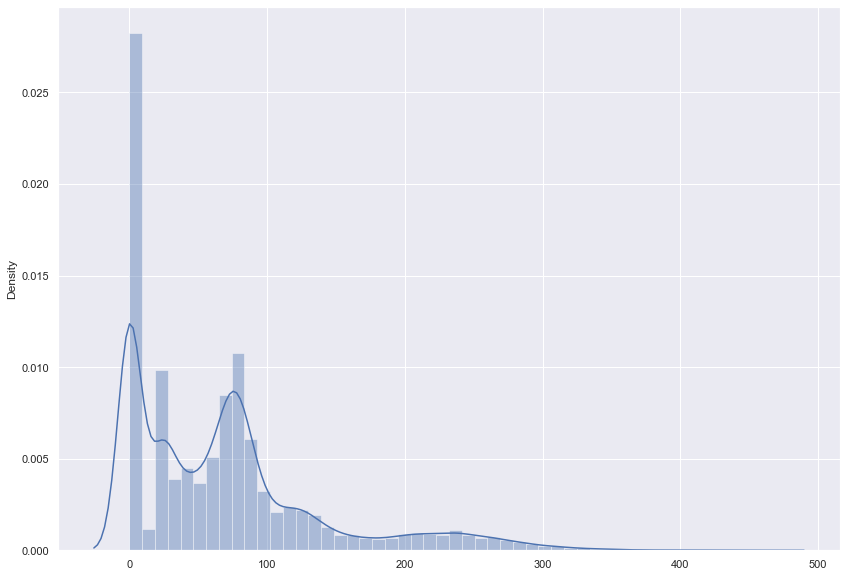

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


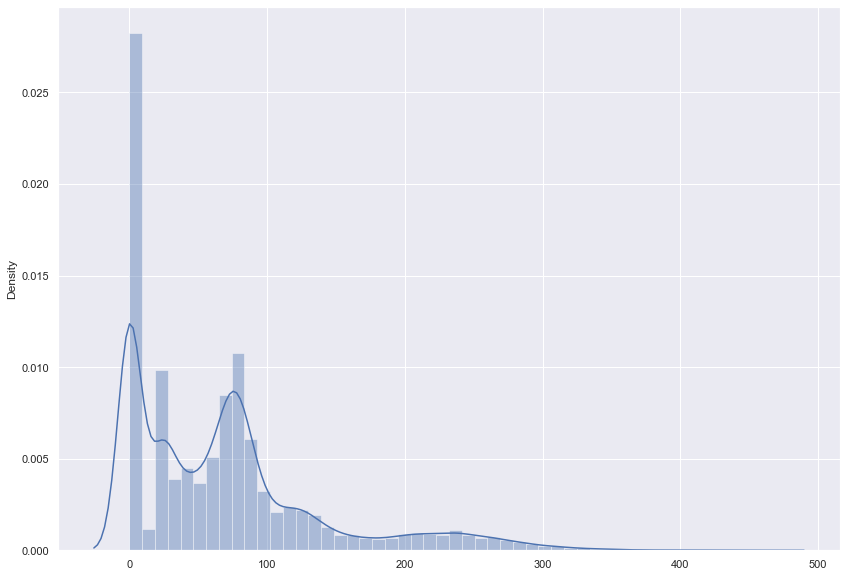

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


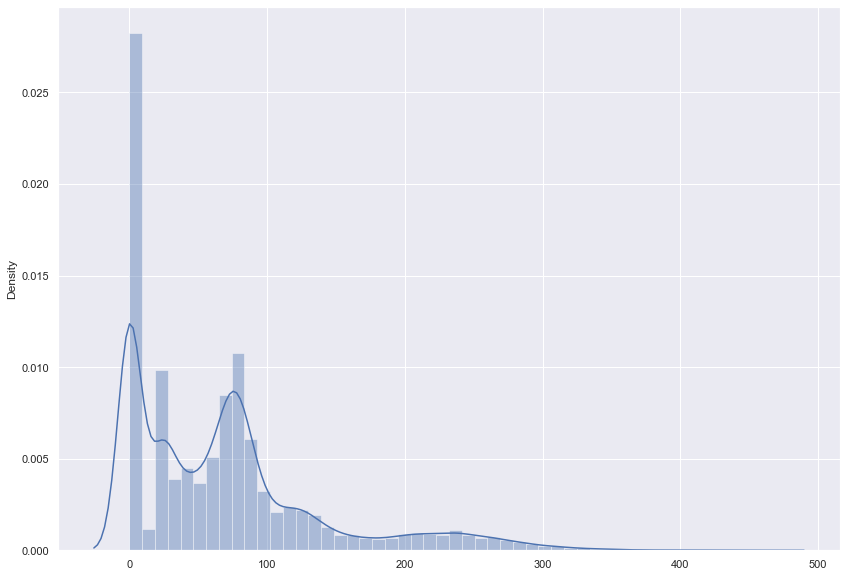

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


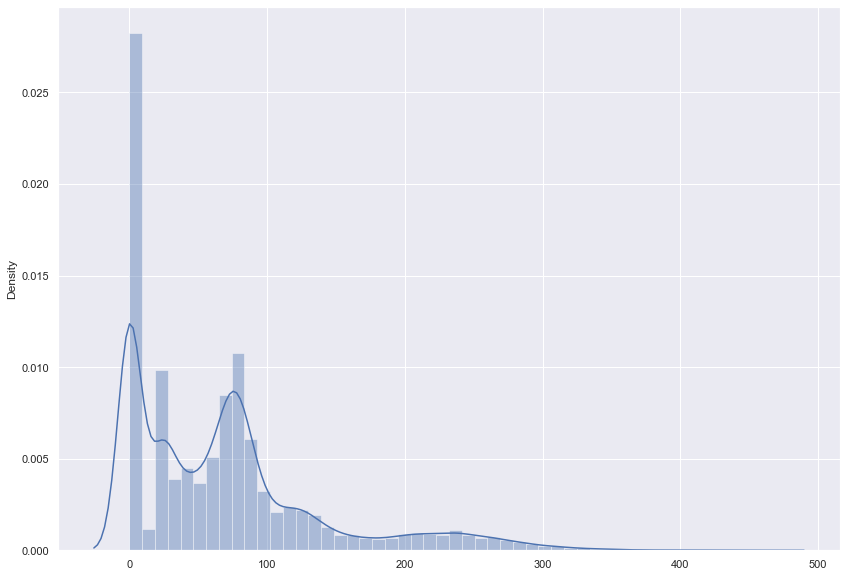

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


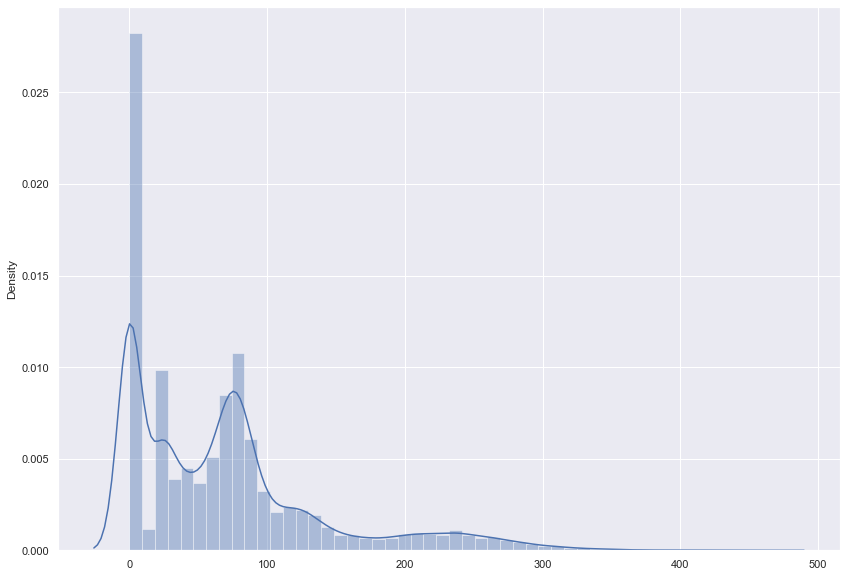

In [28]:
nf=[ 'age', 'cigsPerDay','prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

for f in nf :
    plt.figure(figsize=(14,10))  #figuresize define
    sns.set(font_scale=1) #fontsize 
    sns.distplot(heart[nf])
    plt.show()

<AxesSubplot:xlabel='male', ylabel='count'>

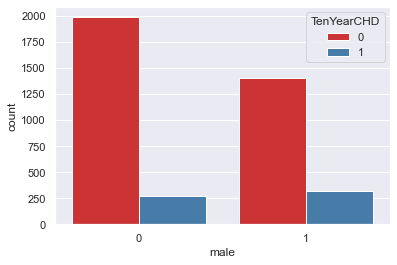

In [29]:
sns.countplot(x="male",hue="TenYearCHD", data=heart, palette="Set1")

Text(0.5, 1.0, 'graph showing which gender has more risk ')

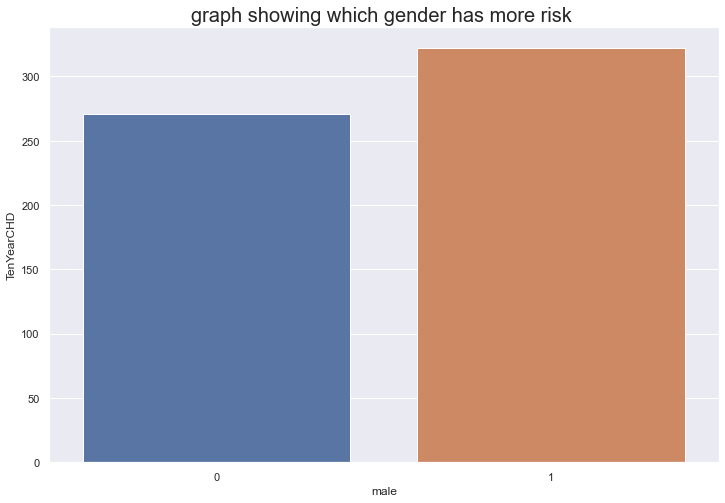

In [30]:
mygraph = heart.groupby("male", as_index=False).TenYearCHD.sum()

plt.figure(figsize=(12,8),facecolor='w')
sns.barplot(x=mygraph["male"], y=mygraph["TenYearCHD"])
plt.title("graph showing which gender has more risk ", size=20)


In [31]:
x=heart.iloc[:,0:15].values
y=heart.iloc[:,15:16].values

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [34]:
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)

rf.fit(x_train, y_train)

rf_predicted = rf.predict(x_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

rf_acc_score = accuracy_score (y_test, rf_predicted)

print("confussion matrix")

print(rf_conf_matrix)

print("\n")

print("Accuracy of Random Forest: ", rf_acc_score *100, '\n')

print(classification_report (y_test, rf_predicted))

C:\Users\Pranali\AppData\Local\Temp\ipykernel_15168\2131358317.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


confussion matrix
[[1350    8]
 [ 231    6]]


Accuracy of Random Forest:  85.01567398119121 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1358
           1       0.43      0.03      0.05       237

    accuracy                           0.85      1595
   macro avg       0.64      0.51      0.48      1595
weighted avg       0.79      0.85      0.79      1595

